<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Polynomial Regression</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.11</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise, we will build polynomial regression models. For this purpose, we will use a small dataset called **Boston House-price**. The dataset contains 506 observations, each observation having 13 independent variables and one target variable (price). The scope is to predict the price using some of the independent variables. <br>
**Note**: *The source of the "Boston House-price" dataset can be found at http://lib.stat.cmu.edu/datasets/boston. However, we will use the built-in method of the scikit-learn library to obtain this dataset.*

### Table of contents
1. [Reading and analyzing the data](#ReadingData)
2. [Fitting a linear model](#LinearRegression)
3. [Polynomial regression](#PolyRegression)
4. [Risk of overfitting with polynomial regression](#PolyOverfit)

## 1. Reading and analyzing the data <a name="ReadingData"></a>

As a first step, we import all the required libraries and set the plots to be made inline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline

### Loading the data

Then read the "Boston House-price" dataset using the scikit-learn library.

In [2]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

As can be seen, the data is stored in a dictionary. Let's check the filename and description.

In [3]:
print(boston['filename'])
print()
print(boston['DESCR'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial 

The description is quite verbose, so there is no need for any further explanation. Load the data into a pandas dataframe. Target data will be called 'PRICE' instead of 'MEDV'.

In [4]:
data=pd.DataFrame(boston['data'],columns=boston['feature_names'])
data['PRICE']=boston['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Analyzing the data

First, we shall check the data types and whether there are no missing values in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


As can be seen, all variables are stored as float values, and there are no missing values. <br>
Let's see some statistics of the data.

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let's create the box plot of the data. We need to standardize the data first to have a better visual view.

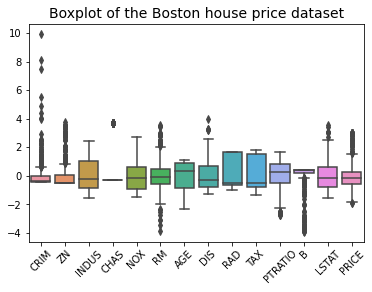

In [7]:
import seaborn as sns
data1=(data-data.mean())/data.std()
ax=sns.boxplot(data=data1.loc[:,:],orient='v')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Boxplot of the Boston house price dataset",fontsize=14)
plt.show()

We may also check the histogram of the target.

<AxesSubplot:xlabel='PRICE', ylabel='Count'>

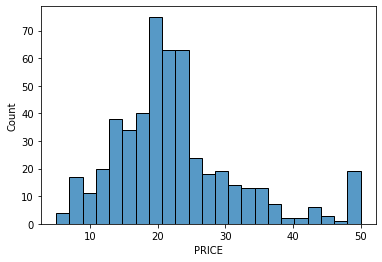

In [8]:
sns.histplot(data['PRICE'])

Load the data into NumPy (input/output) arrays and store the number of features and samples.

In [9]:
X=boston['data']
y_=boston['target'][:,np.newaxis]
N,D=X.shape
print("Number of observations =",N)
print("Number of features =", D)

Number of observations = 506
Number of features = 13


Let's check the categorical variable 'CHAS'.

In [10]:
print("Unique values of the categorical variable:",data['CHAS'].unique())
print("Percentage of 1 values in the categorical variable:",data['CHAS'].mean()*100)

Unique values of the categorical variable: [0. 1.]
Percentage of 1 values in the categorical variable: 6.91699604743083


Because the categorical variable contains only two unique values corresponding to binary values of 0 and 1, there is no need for encoding. <br>
Let's make the pairwise scatter plot matrix of the price against the individual continuous variables. 

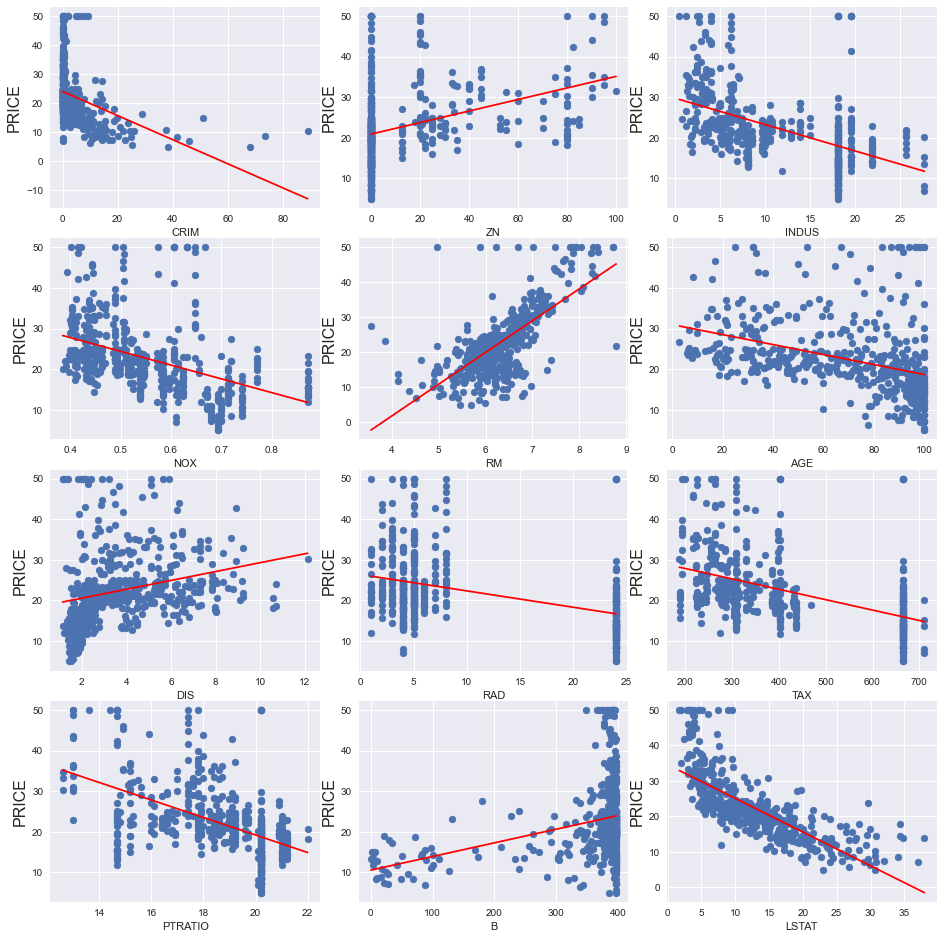

In [11]:
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')
fig = plt.subplots(4, 3, figsize=(13, 13))
xvarlist=['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
linregr=LinearRegression()
plt.tight_layout()
for i in range(D-1):
    plt.subplot(4,3,i+1)
    plt.scatter(data[xvarlist[i]],y_)
    x_=data[xvarlist[i]].to_numpy().reshape(-1,1)
    linregr.fit(x_,y_)
    plt.plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r')
    plt.xlabel(xvarlist[i])
    plt.ylabel('PRICE',size=16)
plt.show()

As can be observed, not all independent variables show a linear relation with price (for example, see PRICE vs. LSTAT).

## 2. Fitting a linear model <a name="LinearRegression"></a>

Regardless of what we have observed on the scatter plot, let's fit a linear model using all independent variables.

In [12]:
model = ols(formula = 'PRICE ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=data).fit()
print(model.summary(title='Linear regression with all the predictors'))
print("\nRMSE =",np.sqrt(model.mse_resid))

                  Linear regression with all the predictors                   
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          6.72e-135
Time:                        19:58:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

As can be observed, two independent variables have large p-values, so let's fit the linear model by removing those two variables.

In [13]:
model = ols(formula = 'PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=data).fit()
print(model.summary(title='Linear regression with INDUS and AGE removed'))
print("\nRMSE =",np.sqrt(model.mse_resid))

                 Linear regression with INDUS and AGE removed                 
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          5.54e-137
Time:                        19:58:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

### Checking correlations among predictors

According to the p-values, all the coefficients are significantly non-zero for the remaining 11 features. However, the condition number is still large, indicating ill-conditioning of the design matrix. That might be due to strong multicollinearity between the predictors. <br>
So let's check the variance inflation factors.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
cols=['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df=data[cols]
X=add_constant(df).to_numpy()
print("Variance inflation factors:")
for idx in range(1,12):
    print((cols[idx-1],variance_inflation_factor(X,idx)))

Variance inflation factors:
('CRIM', 1.7897041598301722)
('ZN', 2.2392286709170564)
('CHAS', 1.0598192219819345)
('NOX', 3.7780109907146673)
('RM', 1.834806373495738)
('DIS', 3.4434203360878866)
('RAD', 6.861126314588104)
('TAX', 7.272386358049807)
('PTRATIO', 1.7576814966096734)
('B', 1.3415587496473569)
('LSTAT', 2.581984267903098)


None of the variance inflation factors are above 10, but two of them are well above 5 ('RAD' and 'TAX'). That indicates some collinearity issues.

We will now check the correlation matrix among the predictors, respective between predictors and target ('INDUS' and 'AGE' not included as their coefficient is significantly not different from zero). To ease our life in discovering the correlations among variables, a heatmap is also used. On the heatmap, the dark red represents the full positive correlation, while the dark blue the full negative correlation among variables (white color corresponds to no correlation). 

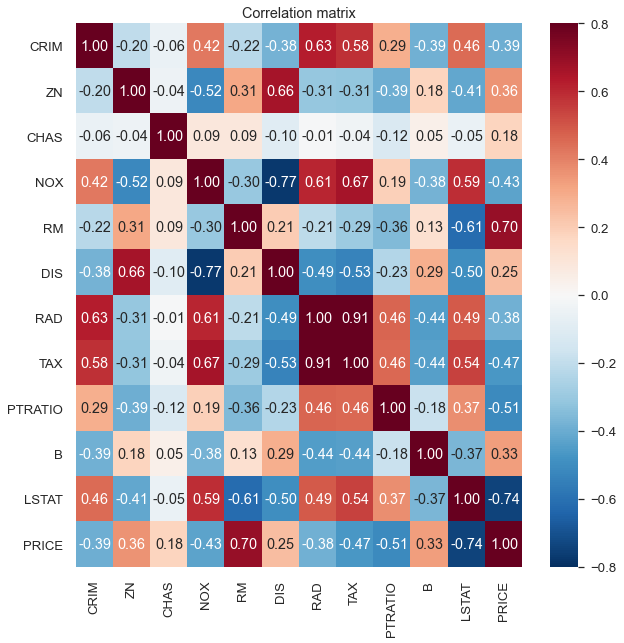

In [15]:
import seaborn as sns
corr_matrix=data[['CRIM','ZN','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
hm=sns.heatmap(data=corr_matrix, vmin=-0.8,vmax=+0.8,fmt='1.2f',annot=True,cmap="RdBu_r")
hm.set_xticklabels(hm.get_yticklabels(), rotation = 90)
plt.title('Correlation matrix')
plt.show()

Using heatmap, we can immediately spot that there is a high correlation between the following predictors:
- **TAX** and **RAD** (+0.91)
- **DIS** and **NOX** (-0.77)
- **TAX** and **NOX** (+0.67)
- **DIS** and **ZN** (+0.66)
- **RAD** and **CRIM** (+0.63)
- **RAD** and **NOX** (+0.61)
- **RM** and **LSTAT** (-0.61)
- **LSTAT** and **NOX** (+0.59)
- **TAX** and **CRIM** (+0.58)
- **LSTAT** and **TAX** (+0.54)

We can observe that TAX and RAD have the highest correlation, and this correlation is almost perfect. Both TAX and RAD are also correlated with other predictors.

Let's fit another linear model by removing these two predictors.

In [16]:
model = ols(formula = 'PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT', data=data).fit()
print(model.summary(title='Linear regression with reduced set of features'))
print("\nRMSE =",np.sqrt(model.mse_resid))

                Linear regression with reduced set of features                
Dep. Variable:                  PRICE   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     148.1
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          1.98e-134
Time:                        19:58:26   Log-Likelihood:                -1510.1
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     496   BIC:                             3082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5080      4.873      6.056      0.0

The condition number is still high so let's center the data using StandardScaler of the scikit-learn library to remove ill-conditioning of the product matrix $\mathbf X^\top\mathbf X$.

**Note:** *Centering is also beneficial when creating polynomial features to avoid structural multicollinearity issues discussed in the book.*

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_std=False)
df=pd.DataFrame(scaler.fit_transform(data[data.columns[:-1]].to_numpy()),columns=data.columns[:-1])
df['PRICE']=data['PRICE']
data=df

We can check the mean of each column. Mean should be 0 for all input variables (the last column is the output which was not centered).

In [18]:
print("Mean of columns:\n",df.mean())

Mean of columns:
 CRIM      -3.096337e-15
ZN         2.076161e-14
INDUS      5.960976e-15
CHAS      -1.189760e-16
NOX        6.582350e-18
RM        -2.632940e-17
AGE       -5.420346e-15
DIS       -2.913787e-16
RAD        4.683123e-15
TAX        3.370163e-13
PTRATIO   -2.632940e-15
B         -5.504600e-14
LSTAT     -8.969549e-16
PRICE      2.253281e+01
dtype: float64


Now, let's fit a linear model again using the *statsmodels* library.

In [19]:
model = ols(formula = 'PRICE ~ CRIM+ZN+CHAS+NOX+RM+DIS+PTRATIO+B+LSTAT', data=df).fit()
print(model.summary(title='Linear regression with redusced set of standardized features'))
print("\nRMSE =",np.sqrt(model.mse_resid))

         Linear regression with redusced set of standardized features         
Dep. Variable:                  PRICE   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     148.1
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          1.98e-134
Time:                        19:58:26   Log-Likelihood:                -1510.1
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     496   BIC:                             3082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.215    104.884      0.0

The condition number decreased and now is just above the threshold. That indicates that some minor collinearity issue is still present. You can check this with the variance inflation factors.

In [20]:
cols=['CRIM','ZN','CHAS','NOX','RM','DIS','PTRATIO','B','LSTAT']
df=data[cols]
X=add_constant(df).to_numpy()
print("Variance inflation factors:")
for idx in range(1,10):
    print((cols[idx-1],variance_inflation_factor(X,idx)))

Variance inflation factors:
('CRIM', 1.4762809528457272)
('ZN', 2.119038316829217)
('CHAS', 1.0518791454193932)
('NOX', 3.0343164765391704)
('RM', 1.7742607194955538)
('DIS', 3.41053508872864)
('PTRATIO', 1.3955028080058018)
('B', 1.302455380490186)
('LSTAT', 2.5779268647135205)


And indeed, two variables have a VIF value above 3, which provides a hint of the presence of some multicollinearity.

### Searching for Outliers

Before moving on, let's see if there are outliers/influential points in the data.

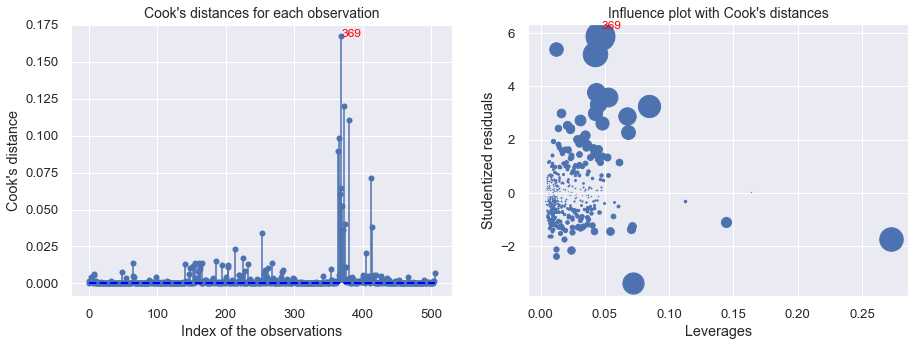

In [21]:
cook_=model.get_influence().cooks_distance[0][:,np.newaxis]
h_=model.get_influence().hat_matrix_diag
rstud_=model.get_influence().resid_studentized_internal
idxC=np.where(cook_>0.15)[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
idx=np.argsort(cook_)[::-1][:5]
(markerLines, stemLines, baseLines) = ax[0].stem(cook_)
plt.setp(baseLines, color = 'blue', linewidth = 2, linestyle  = 'dashed')
for i in idxC:
    ax[0].annotate(i+1,(i,cook_[i]),(i+0.9,cook_[i]),color='red',fontsize=12)
ax[0].set_xlabel('Index of the observations')
ax[0].set_ylabel("Cook's distance")
ax[0].set_title("Cook's distances for each observation",size=14)

for i in range(N):
    ax[1].scatter(h_[i],rstud_[i],c='b',s=cook_[i]*5000)
    if i in idxC:
        ax[1].annotate(i+1, (float(h_[i])+0.001,float(rstud_[i])+0.1+cook_[i]),color='red',fontsize=12)
ax[1].set_xlabel('Leverages')
ax[1].set_ylabel('Studentized residuals')
ax[1].set_title("Influence plot with Cook's distances",size=14)
plt.show()

The results do not show any influential points. There is no large Cook's distance compared to the rest, and the largest one has a value around 0.175 which is well below the threshold of 1 (or even 0.5).

### Checking the (studentized) residuals

Next, let's check the studentized residuals of the linear model. First, we can create a QQ plot to see if the studentized residuals follow the normal distribution.

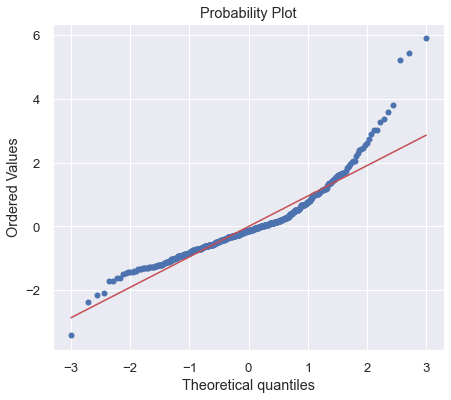

In [22]:
from scipy import stats
fig,ax = plt.subplots(1, 1, figsize=(7, 6))
result=stats.probplot(rstud_, plot=ax)
plt.show()

There are several residuals not fitting the normal distribution. Because we did not suspect any outlier, let's see the studentized residuals vs. the fitted value (residual plot) to see how well our linear model performs. If the relation is linear, the residuals should lie around the horizontal line drawn at zero residual.

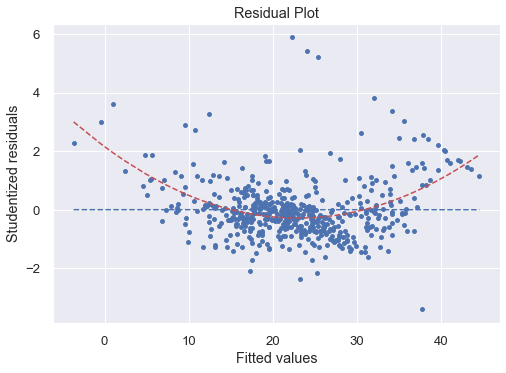

In [23]:
def residplot(ypred_,rstud_):
    plt.scatter(ypred_,rstud_,s=15)

    linregr.fit(ypred_,rstud_)
    plt.plot([ypred_.min(),ypred_.max()],linregr.predict(np.array([[ypred_.min()],[ypred_.max()]])),'b--')

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2,include_bias=False)
    Xr=poly.fit_transform(ypred_)
    linregr.fit(Xr,rstud_)
    plt.plot(np.sort(ypred_,axis=0),linregr.predict(Xr[ypred_.argsort(axis=0)].squeeze()),'r--')

    plt.xlabel("Fitted values")
    plt.ylabel("Studentized residuals")
    plt.title("Residual Plot")
    plt.show()

rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(data[['CRIM','ZN','CHAS','NOX','RM','DIS','PTRATIO','B','LSTAT']]))[:,np.newaxis]
residplot(ypred_,rstud_)

As can be observed, the residuals do not scatter around the zero residual evenly (dashed blue line). Instead, the residuals are mostly negative in the middle and mostly positive at either end. That suggests the relationship between predictors and response is not linear, and a non-linear model would be a better fit. For comparison, we also fit a quadratic curve on the residuals vs. predicted values shown with dashed red. So we might try fitting a polynomial model instead of a linear model on this data.

To keep our model simple (low number of predictors to be used), first see the candidate features, which might be used in polynomial regression. For this purpose, place in descending order the predictors based on the correlation with the target. 

In [24]:
corr_matrix['PRICE'].abs().sort_values()[-2::-1]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

Although there is some correlation between RM and LSTAT (-0.61), these two independent variables manifest the highest correlation with the target. So, let's fit a linear model using only these two variables.

In [25]:
model = ols(formula = 'PRICE ~ RM + LSTAT', data=data).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          7.01e-112
Time:                        19:58:32   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.246     91.487      0.0

And indeed, almost 64% of the price variation can be explained using only these two variables. As one would expect, the price is proportional with the average number of rooms per dwelling (RM) and inversely proportional with the percent of the lower status of the population (LSTAT) (i.e., the higher the number of lower status people in the neighboring, the lower the house price). <br>
Let's see the residual plot.

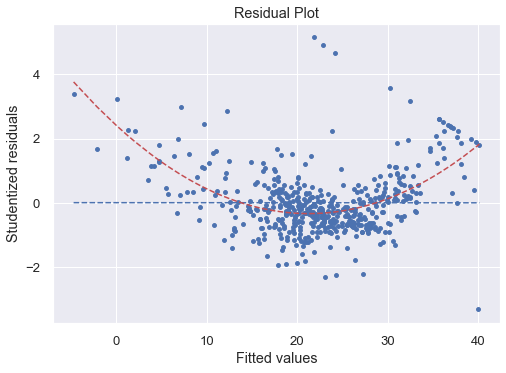

In [26]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(data[['RM','LSTAT']]))[:,np.newaxis]
residplot(ypred_,rstud_)

The residual plot shows that the linear model is not a good fit. So let's try to use a polynomial model instead.

## 3. Polynomial regression <a name="PolyRegression"></a>

Now that we have a sense of our data and how much the predictors explain the variation of the response variable, let's see if a better model can be obtained using polynomial regression. 

### Polynomial regression using two input variables

Knowing that 'RM' and 'LSTAT' are good candidates in explaining the variation of the target, let's analyze their relation to the target. If we look at the scatter plot between the PRICE and LSTAT (see the scatter plot matrix), we can observe that the relationship is not linear. Even the scatter plot between the PRICE and RM does not correspond to a linear relation. So let's use a polynomial regression of degree 2 and create the polynomial features $\mathrm{RM}$, $\mathrm{LSTAT}$, $\mathrm{RM}^2$, $\mathrm{RM}\cdot \mathrm{LSTAT}$, $\mathrm{LSTAT}^2$ using scikit-learn.<br>
We may print out the first 5 rows of the newly created input matrix.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
cols=['RM','LSTAT','RMxx2','RMxLSTAT','LSTATxx2']
df=pd.DataFrame(scaler.fit_transform(poly.fit_transform(data[['RM','LSTAT']])),columns=cols)
df['PRICE']=data['PRICE']
df.head()

,RM,LSTAT,RMxx2,RMxLSTAT,LSTATxx2,PRICE
0,0.290366,-7.673063,-0.408383,0.845661,7.981920,24.0
1,0.136366,-3.513063,-0.474100,2.594594,-38.552366,21.6
2,0.900366,-8.623063,0.317963,-4.690255,23.463240,34.7
3,0.713366,-9.713063,0.016195,-3.855310,43.449618,33.4
4,0.862366,-7.323063,0.250979,-3.241503,2.733276,36.2


Then fit the linear model using these polynomial features.

In [28]:
model = ols(formula = 'PRICE ~ RM + LSTAT + RMxx2 + RMxLSTAT + LSTATxx2', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     312.0
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          3.79e-151
Time:                        19:58:32   Log-Likelihood:                -1482.0
No. Observations:                 506   AIC:                             2976.
Df Residuals:                     500   BIC:                             3001.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.202    111.305      0.0

As can be seen, the goodness of fit values is slightly better than for the linear model with all features used.

We can remove the variables with p-values above the 0.05 (5%) threshold.

In [29]:
model = ols(formula = 'PRICE ~ RM + LSTAT + RMxx2 + RMxLSTAT', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     387.3
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          9.82e-152
Time:                        19:58:32   Log-Likelihood:                -1483.8
No. Observations:                 506   AIC:                             2978.
Df Residuals:                     501   BIC:                             2999.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.203    111.039      0.0

Let's check the residual plot of the last model.

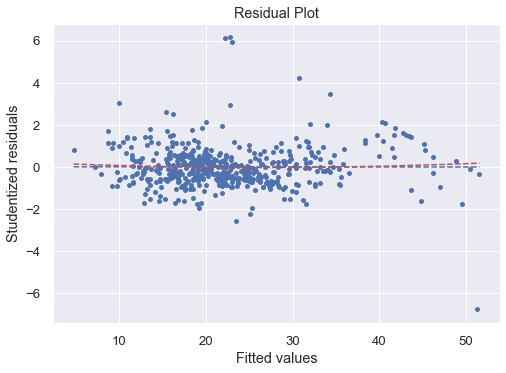

In [30]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(df[['RM','LSTAT','RMxx2','RMxLSTAT']]))[:,np.newaxis]
residplot(ypred_,rstud_)

We can conclude that, even if the goodness of fit values are only slightly improved compared to the linear model with all predictors included, the residual plot shows that the polynomial model is a much better fit.

#### Higher order polynomial for two input variables

We can try using higher-order polynomials of the two features: 'RM' and 'LSTAT'.

In [31]:
poly = PolynomialFeatures(degree=3,include_bias=False)
df=pd.DataFrame(scaler.fit_transform(poly.fit_transform(data[['RM','LSTAT']])),columns=['RM','LSTAT','RMxx2','RMxLSTAT',\
                                                                'LSTATxx2','RMxx3','RMxx2xLSTAT','RMxLSTATxx2','LSTATxx3'])
df['PRICE']=data['PRICE']
df.head()

,RM,LSTAT,RMxx2,RMxLSTAT,LSTATxx2,RMxx3,RMxx2xLSTAT,RMxLSTATxx2,LSTATxx3,PRICE
0,0.290366,-7.673063,-0.408383,0.845661,7.981920,-0.114687,-0.432534,29.582226,-779.897532,24.0
1,0.136366,-3.513063,-0.474100,2.594594,-38.552366,-0.136633,0.149071,14.169661,-371.495900,21.6
2,0.900366,-8.623063,0.317963,-4.690255,23.463240,0.590720,-6.775958,79.435373,-969.326039,34.7
3,0.713366,-9.713063,0.016195,-3.855310,43.449618,0.223856,-4.728487,79.788167,-1244.504361,33.4
4,0.862366,-7.323063,0.250979,-3.241503,2.733276,0.502151,-5.231576,58.732990,-720.854813,36.2


Then fit the linear model using all these polynomial features.

In [32]:
model = ols(formula = 'PRICE ~ RM+LSTAT+RMxx2+RMxLSTAT+LSTATxx2+RMxx3+RMxx2xLSTAT+RMxLSTATxx2+LSTATxx3', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     185.6
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          1.40e-152
Time:                        19:58:33   Log-Likelihood:                -1467.2
No. Observations:                 506   AIC:                             2954.
Df Residuals:                     496   BIC:                             2997.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.5328      0.197    114.150      

and remove the variables with high p-values.

In [33]:
model = ols(formula = 'PRICE ~ RM+LSTAT+RMxLSTAT+RMxx3+RMxx2xLSTAT', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     332.4
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.19e-156
Time:                        19:58:33   Log-Likelihood:                -1469.8
No. Observations:                 506   AIC:                             2952.
Df Residuals:                     500   BIC:                             2977.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.5328      0.198    114.028      

The adjusted R-squared and RMSE are slightly improved. We can check the residual plot.

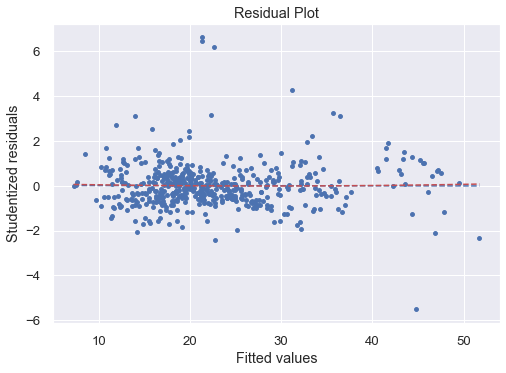

In [34]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(df[['RM','LSTAT','RMxLSTAT','RMxx3','RMxx2xLSTAT']]))[:,np.newaxis]
residplot(ypred_,rstud_)

The quadratic fit almost coincides with the horizontal blue dashed line drawn at zero residual. We can try to fit even a higher-order polynomial to improve our model. However, that might overfit the data, as we will discuss at the end of the exercise.

### Polynomial regression using three independent variables

Now, let's add another independent variable exhibiting high correlation with the response variable ('PTRATIO) and create the polynomial features of degree 2.<br>
We can also print out the first five rows of the newly created input matrix.

In [35]:
poly = PolynomialFeatures(degree=2,include_bias=False)
df=pd.DataFrame(scaler.fit_transform(poly.fit_transform(data[['RM','PTRATIO','LSTAT']])),columns=['RM','PTRATIO','LSTAT',\
                                                        'RMxx2','RMxPTRATIO','RMxLSTAT','PTRATIOxx2','PTRATIOxLSTAT','LSTATxx2'])
df['PRICE']=data['PRICE']
df.head()

,RM,PTRATIO,LSTAT,RMxx2,RMxPTRATIO,RMxLSTAT,PTRATIOxx2,PTRATIOxLSTAT,LSTATxx2,PRICE
0,0.290366,-3.155534,-7.673063,-0.408383,-0.376564,0.845661,5.279666,18.441309,7.981920,24.0
1,0.136366,-0.655534,-3.513063,-0.474100,0.450302,2.594594,-4.248002,-3.468369,-38.552366,21.6
2,0.900366,-0.655534,-8.623063,0.317963,-0.050525,-4.690255,-4.248002,-0.118593,23.463240,34.7
3,0.713366,0.244466,-9.713063,0.016195,0.714088,-3.855310,-4.617962,-8.145818,43.449618,33.4
4,0.862366,0.244466,-7.323063,0.250979,0.750514,-3.241503,-4.617962,-7.561543,2.733276,36.2


Then fit the linear model using all these polynomial features.

In [36]:
model = ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT+RMxx2+RMxPTRATIO+RMxLSTAT+PTRATIOxx2+PTRATIOxLSTAT+LSTATxx2', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.99e-165
Time:                        19:58:33   Log-Likelihood:                -1437.4
No. Observations:                 506   AIC:                             2895.
Df Residuals:                     496   BIC:                             2937.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.186    121.093

and remove the variables with high p-value (i.e., for those that the -test indicates that the null hypothesis cannot be rejected).

In [37]:
model = ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT+RMxx2+RMxPTRATIO+PTRATIOxLSTAT+LSTATxx2', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     270.8
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.73e-165
Time:                        19:58:33   Log-Likelihood:                -1443.0
No. Observations:                 506   AIC:                             2902.
Df Residuals:                     498   BIC:                             2936.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.188    119.991

Some further improvement can be seen. Let's check the residual plot.

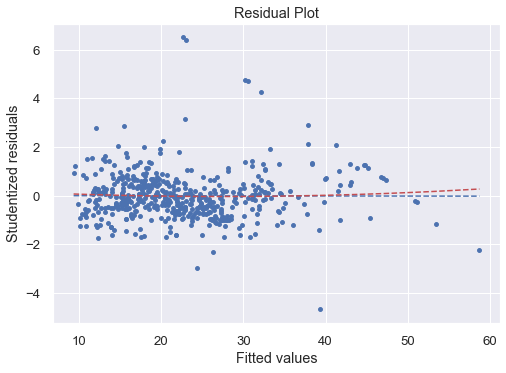

In [38]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(df[['RM','PTRATIO','LSTAT','RMxx2','RMxPTRATIO','PTRATIOxLSTAT','LSTATxx2']]))[:,np.newaxis]
residplot(ypred_,rstud_)

#### Higher order polynomial for three input variables

We can try using higher-order polynomials of the three features: 'RM', 'PTRATIO', and 'LSTAT'. <br>
First, create the polynomial features of degree 3.

In [39]:
poly = PolynomialFeatures(degree=3,include_bias=False)
df=pd.DataFrame(scaler.fit_transform(poly.fit_transform(data[['RM','PTRATIO','LSTAT']])),columns=['RM','PTRATIO','LSTAT','RMxx2'\
                        ,'RMxPTRATIO','RMxLSTAT','PTRATIOxx2','PTRATIOxLSTAT','LSTATxx2','RMxx3','RMxx2xPTRATIO','RMxx2xLSTAT',\
                'RMxPTRATIOxx2','RMxPTRATIOxLSTAT','RMxLSTATxx2','PTRATIOxx3','PTRATIOxx2xLSTAT','PTRATIOxLSTATxx2','LSTATxx3'])
df['PRICE']=data['PRICE']
df.head()

,RM,PTRATIO,LSTAT,RMxx2,RMxPTRATIO,RMxLSTAT,PTRATIOxx2,PTRATIOxLSTAT,LSTATxx2,RMxx3,RMxx2xPTRATIO,RMxx2xLSTAT,RMxPTRATIOxx2,RMxPTRATIOxLSTAT,RMxLSTATxx2,PTRATIOxx3,PTRATIOxx2xLSTAT,PTRATIOxLSTATxx2,LSTATxx3,PRICE
0,0.290366,-3.155534,-7.673063,-0.408383,-0.376564,0.845661,5.279666,18.441309,7.981920,-0.114687,0.119588,-0.432534,1.921939,4.947353,29.582226,-23.327838,-73.079814,-194.059133,-779.897532,24.0
1,0.136366,-0.655534,-3.513063,-0.474100,0.450302,2.594594,-4.248002,-3.468369,-38.552366,-0.136633,0.373448,0.149071,-0.910746,-1.769116,14.169661,7.811349,1.814238,-16.364596,-371.495900,21.6
2,0.900366,-0.655534,-8.623063,0.317963,-0.050525,-4.690255,-4.248002,-0.118593,23.463240,0.590720,-0.145776,-6.775958,-0.582437,3.006347,79.435373,7.811349,-0.381653,-57.017909,-969.326039,34.7
3,0.713366,0.244466,-9.713063,0.016195,0.714088,-3.855310,-4.617962,-8.145818,43.449618,0.223856,0.510045,-4.728487,-0.926712,-3.777056,79.788167,8.107658,2.743397,14.789586,-1244.504361,33.4
4,0.862366,0.244466,-7.323063,0.250979,0.750514,-3.241503,-4.617962,-7.561543,2.733276,0.502151,0.567442,-5.231576,-0.917807,-3.627000,58.732990,8.107658,2.886233,4.835809,-720.854813,36.2


Then fit the linear model using all these polynomial features.

In [40]:
model = ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT+RMxx2+RMxPTRATIO+RMxLSTAT+PTRATIOxx2+PTRATIOxLSTAT+LSTATxx2+RMxx3+\
                    RMxx2xPTRATIO+RMxx2xLSTAT+RMxPTRATIOxx2+RMxPTRATIOxLSTAT+RMxLSTATxx2+PTRATIOxx3+PTRATIOxx2xLSTAT+\
                    PTRATIOxLSTATxx2+LSTATxx3', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     109.8
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          4.55e-162
Time:                        19:58:34   Log-Likelihood:                -1418.7
No. Observations:                 506   AIC:                             2877.
Df Residuals:                     486   BIC:                             2962.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           22.5328      0.181  

and remove features with p-values above or close to the threshold.

In [41]:
model = ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT+RMxPTRATIO+RMxLSTAT+PTRATIOxLSTAT+RMxx3+RMxx2xLSTAT', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     250.4
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          5.98e-169
Time:                        19:58:34   Log-Likelihood:                -1431.5
No. Observations:                 506   AIC:                             2881.
Df Residuals:                     497   BIC:                             2919.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.184    122.627

Using higher-order polynomial, a very small improvement can be seen. Let's check the residual plot.

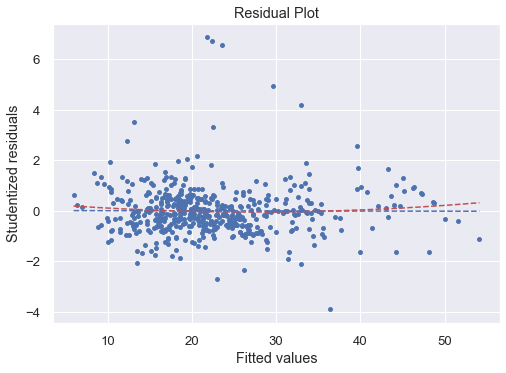

In [42]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(df[['RM','PTRATIO','LSTAT','RMxPTRATIO','RMxLSTAT','PTRATIOxLSTAT','RMxx3','RMxx2xLSTAT']]))\
[:,np.newaxis]
residplot(ypred_,rstud_)

### Polynomial regression using four independent variables

We can add the next predictor manifesting a high correlation with the target ('NOX'). Remember that we removed 'TAX' from the linear model, so we should not use it here.  

In [43]:
poly = PolynomialFeatures(degree=2,include_bias=False)
df=pd.DataFrame(scaler.fit_transform(poly.fit_transform(data[['RM','NOX','PTRATIO','LSTAT']])),\
                columns=['RM','NOX','PTRATIO','LSTAT','RMxx2','RMxNOX','RMxPTRATIO','RMxLSTAT',\
                         'NOXxx2','NOXxPTRATIO','NOXxLSTAT','PTRATIOxx2','PTRATIOxLSTAT','LSTATxx2'])
df['PRICE']=data['PRICE']
df.head()

,RM,NOX,PTRATIO,LSTAT,RMxx2,RMxNOX,RMxPTRATIO,RMxLSTAT,NOXxx2,NOXxPTRATIO,NOXxLSTAT,PTRATIOxx2,PTRATIOxLSTAT,LSTATxx2,PRICE
0,0.290366,-0.016695,-3.155534,-7.673063,-0.408383,0.019707,-0.376564,0.845661,-0.013122,0.005378,-0.359878,5.279666,18.441309,7.981920,24.0
1,0.136366,-0.085695,-0.655534,-3.513063,-0.474100,0.012869,0.450302,2.594594,-0.006057,0.008872,-0.186928,-4.248002,-3.468369,-38.552366,21.6
2,0.900366,-0.085695,-0.655534,-8.623063,0.317963,-0.052602,-0.050525,-4.690255,-0.006057,0.008872,0.250974,-4.248002,-0.118593,23.463240,34.7
3,0.713366,-0.096695,0.244466,-9.713063,0.016195,-0.044424,0.714088,-3.855310,-0.004051,-0.070942,0.451225,-4.617962,-8.145818,43.449618,33.4
4,0.862366,-0.096695,0.244466,-7.323063,0.250979,-0.058832,0.750514,-3.241503,-0.004051,-0.070942,0.220124,-4.617962,-7.561543,2.733276,36.2


Then fit the linear model using all polynomial features.

In [44]:
model = ols(formula = 'PRICE ~ RM+NOX+PTRATIO+LSTAT+RMxx2+RMxNOX+RMxPTRATIO+RMxLSTAT+\
                         NOXxx2+NOXxPTRATIO+NOXxLSTAT+PTRATIOxx2+PTRATIOxLSTAT+LSTATxx2', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     170.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          3.07e-178
Time:                        19:58:34   Log-Likelihood:                -1392.8
No. Observations:                 506   AIC:                             2816.
Df Residuals:                     491   BIC:                             2879.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.171    131.565

Then remove variables with p-values above the threshold (or even near the threshold) from the model. 

In [45]:
model = ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT+RMxNOX+RMxPTRATIO+\
                         NOXxLSTAT+PTRATIOxx2+PTRATIOxLSTAT+LSTATxx2', data=df).fit()
print(model.summary())
print("\nRMSE =",np.sqrt(model.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     262.5
Date:                Fri, 30 Jul 2021   Prob (F-statistic):          2.45e-182
Time:                        19:58:34   Log-Likelihood:                -1397.1
No. Observations:                 506   AIC:                             2814.
Df Residuals:                     496   BIC:                             2856.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5328      0.172    131.123

And finally check the residual plot.

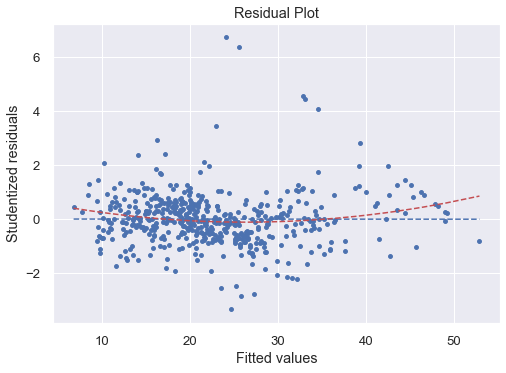

In [46]:
rstud_=model.get_influence().resid_studentized_internal[:,np.newaxis]
ypred_=np.array(model.predict(df[['RM','PTRATIO','LSTAT','RMxNOX','RMxPTRATIO','NOXxLSTAT','PTRATIOxx2','PTRATIOxLSTAT',\
                         'LSTATxx2']]))[:,np.newaxis]
residplot(ypred_,rstud_)

As can be seen, the quadratic fit (dashed red line) does not align perfectly with the horizontal blue dashed line corresponding to the zero residual.

We can try to add higher-order polynomial terms in order to improve slightly further the goodness of fit values. The question is though when we should stop? How many features shall be considered and what degree of the polynomial shall be used?

## 4. Risk of overfitting with polynomial regression <a name="PolyOverfit"></a>

We could see that based on the goodness of fit values, like RMSE or R-squared, we can always improve slightly our model by adding more original features or adding higher polynomial terms. The real question is when we shall stop. 

Consider the case when we know the relation between the predictor and response variable (for example, $y=sin(x)+\epsilon$). And let's take the case when we have only 6 random observations with noise corresponding to this relation. Let's see the result if we try to fit a polynomial regression with different degrees.

Number of observations: 6

For polynomial degree 1 the R-squared value is 0.620
For polynomial degree 2 the R-squared value is 0.741
For polynomial degree 3 the R-squared value is 0.998
For polynomial degree 4 the R-squared value is 0.998
For polynomial degree 5 the R-squared value is 1.000


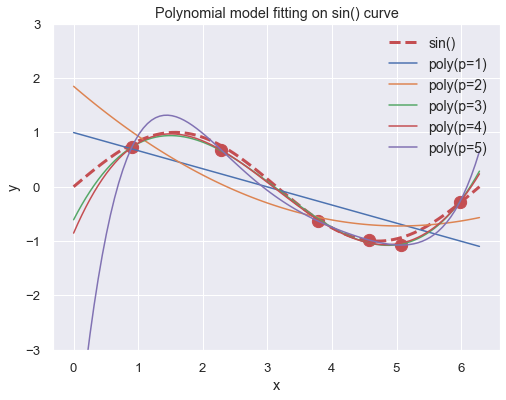

In [47]:
obs_nr=6
print("Number of observations:",obs_nr)
print()

plt.figure(figsize=(8,6))
np.random.seed(seed=36)
xplt=np.linspace(0,2*np.pi,100)
plt.plot(xplt,np.sin(xplt),'r--',lw=3,label='sin()')
x=np.sort(2*np.pi*np.random.rand(obs_nr,1),axis=0)
y=np.sin(x)+np.random.normal(scale=0.1,size=obs_nr)[:,np.newaxis]
plt.scatter(x,y,c='r',s=150)

poly = PolynomialFeatures(degree=1,include_bias=False)
for p in range(1,obs_nr):
    poly.set_params(degree=p)
    X=poly.fit_transform(x)
    linregr.fit(X,y)
    xplt=np.linspace(0,2*np.pi,100)[:,np.newaxis]
    Xplt=poly.fit_transform(xplt)
    plt.plot(xplt,linregr.predict(Xplt),label='poly(p='+str(p)+')')
    print("For polynomial degree %d the R-squared value is %1.3f"%(p,linregr.score(X,y)))
plt.legend(loc='best',fontsize=14)    
plt.ylim(-3,3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial model fitting on sin() curve')
plt.show()

As can be seen, we can always fit perfectly a polynomial model on the data if we choose the degree of the polynomial high enough (p=5 in this case, but for general case with N observations p=N-1). However, from the shape of the curve for p=5, it is also clear that the perfect fit is, in fact, a very poor model, and with new data, the model will provide wrong predictions. We say that the polynomial model overfits the available sample data. We will discuss this issue in more detail at a later exercise.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).